### HTML 初步

參考: https://www.youtube.com/watch?v=Jt7PA-h-XdI&index=14&list=PLS6ActuqbfA2bSOZV35MVpsVFvd6xxlzn


    <html>
        <head></head>
        <body>
           <h1> 這是標題文字 </h1>
           <a href="abc.html"> 這是超連結 </a>
           <div id="school" class="myclass"> 高師大附中 </div>
           <!--  這是區塊 id 為 school, class 為 myclass  -->
        </body>
    </html>


    常見的標籤: <a>, <div>, <span> <input> <table> 
    請求模式: GET POST
    表單: form 

div 內的 class name 與 ID 的差別 

id 理論上是整個頁面唯一的標示，一個設計的完善的頁面，應該用有清楚的 id 設計，告訴程式這個區塊是個什麼東西。
    
    <div class="title"> <div id="articleid">
    

   

## 用 requests 取得網頁原始碼

In [1]:
import requests

result = requests.get('https://www.ptt.cc/bbs/Food/index.html')
print(result)
print(result.text)

<Response [200]>
<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Food 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Food/index.html"><span class="board-label">看板 </span>Food</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/

## 分析網頁原始碼，從中找取得想要的資料

直接分析原始碼太過於複雜，因此我們需要額外工具來處理它。

名稱叫做 BeautifulSoup，以及解析引擎 lxml

以上兩個套件必須安裝起來

In [2]:
!pip install BeautifulSoup4
!pip install lxml

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 取得頁面裡的 某個 標籤 tag

In [16]:
import requests
from bs4 import BeautifulSoup
result = requests.get('https://www.ptt.cc/bbs/Food/index.html')
soup = BeautifulSoup(result.text, 'lxml')

print(soup.title)
print(soup.title.text)

<title>看板 Food 文章列表 - 批踢踢實業坊</title>
看板 Food 文章列表 - 批踢踢實業坊


# 利用瀏覽器的"開發者工具"來觀察網頁結構

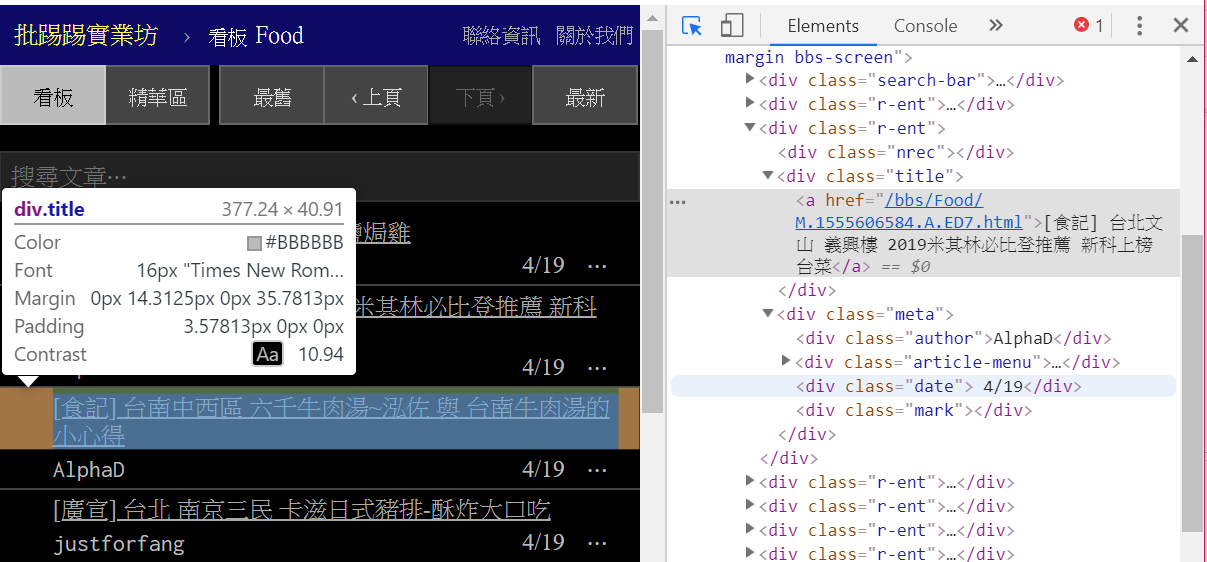

## 取得頁面裡的所有連結

### 使用 soup.select() 函數來取得標籤

In [1]:
import requests
from bs4 import BeautifulSoup
result = requests.get('https://www.ptt.cc/bbs/Food/index.html')
soup = BeautifulSoup(result.text, 'lxml')

for tag in soup.select('a'):
    print(tag)

<a href="/bbs/" id="logo">批踢踢實業坊</a>
<a class="board" href="/bbs/Food/index.html"><span class="board-label">看板 </span>Food</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html">聯絡資訊</a>
<a class="btn selected" href="/bbs/Food/index.html">看板</a>
<a class="btn" href="/man/Food/index.html">精華區</a>
<a class="btn wide" href="/bbs/Food/index1.html">最舊</a>
<a class="btn wide" href="/bbs/Food/index7008.html">‹ 上頁</a>
<a class="btn wide disabled">下頁 ›</a>
<a class="btn wide" href="/bbs/Food/index.html">最新</a>
<a href="/bbs/Food/M.1555681290.A.A81.html">[食記] 台北東區 起上小法師 台灣終於有牛舌定食</a>
<a href="/bbs/Food/search?q=thread%3A%5B%E9%A3%9F%E8%A8%98%5D+%E5%8F%B0%E5%8C%97%E6%9D%B1%E5%8D%80+%E8%B5%B7%E4%B8%8A%E5%B0%8F%E6%B3%95%E5%B8%AB+%E5%8F%B0%E7%81%A3%E7%B5%82%E6%96%BC%E6%9C%89%E7%89%9B%E8%88%8C%E5%AE%9A%E9%A3%9F">搜尋同標題文章</a>
<a href="/bbs/Food/search?q=author%3Awindsora">搜尋看板內 windsora 的文章</a>
<a href="/bbs/Food/M.1555682150.A.FCF.html">[廣宣] 大直美麗華。山茶花鐵板燒-龍蝦套

## 糟糕，找到一大堆我不需要的連結。

## 怎樣準確定位到我想要的連結呢?

## 使用瀏覽器的"開發者模式"

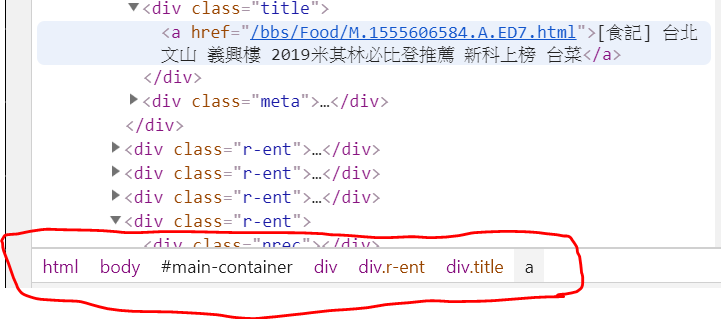

### 整個 HTML 標籤是一個樹狀結構，稱為 DOM Tree，對於任何一個節點來說，都有一個由樹根開始的唯一路徑。

> ## #井字號代表 ID
> ## . 句點代表 class

### 取得標籤，以及標籤內的標籤

soup.select('title')

soup.select('html head title')


### id 的取得，理論上整個頁面裡的 id 必須是唯一的

selector = 'div#topbar'


### 要取得 class name
比如底下這組 HTML 區塊:

    <div class="title">
    <a href="/bbs/Beauty/M.1430099938.A.3B7.html">[公告] 對於謾罵，希望大家將心比心</a>
    </div>


selector = 'div.title'



### 面對多個 class name 的兩種寫法
> selector = "div[class='btn-group btn-group-paging'] a"
> #selector = "div.btn-group.btn-group-paging a"


## 取得 tags 後的處理

tag 的物件型態為: bs4.element.Tag

tag, 

tag.name ==> 取得該 tag 的名稱

tag.text ==> 取得該 tag 內的資訊


In [9]:
print('* 取得 title 標籤')
print(soup.select('title'))

print('* 取得 html 裡面的 head 裡面的 title 標籤')
print(soup.select('html head title'))

print('* 取得 html 裡面的 body 裡面的 h1 標籤')
print(soup.select('html body h1'))

print('* 取得 class 為 title 的 div 標籤')
print(soup.select('div.title'))

print('* 取得 id 為 topbar 的 div 標籤')
print(soup.select('div#topbar'))

print('* 取得 div.title 裡面的 a (超連結)')
for tag in soup.select('div.title a'):
    print(tag.text)

* 取得 title 標籤
[<title>看板 Food 文章列表 - 批踢踢實業坊</title>]
* 取得 html 裡面的 head 裡面的 title 標籤
[<title>看板 Food 文章列表 - 批踢踢實業坊</title>]
* 取得 html 裡面的 body 裡面的 h1 標籤
[]
* 取得 class 為 title 的 div 標籤
[<div class="title">
<a href="/bbs/Food/M.1555605437.A.FDE.html">[食記] 桃園中壢區。三仙巷鹽焗雞</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555606584.A.ED7.html">[食記] 台北文山 義興樓 2019米其林必比登推薦 新科上榜 台菜</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555626752.A.DEB.html">[食記] 台南中西區 六千牛肉湯~泓佐 與 台南牛肉湯的小心得</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555631038.A.A51.html">[廣宣] 台北 南京三民 卡滋日式豬排-酥炸大口吃</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555635587.A.7D9.html">[食記] 台南安平 夏慕尼外帶櫻花蝦炒飯及麵包。</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555637299.A.322.html">[食記] 台北 古亭 Kakigori Toshihiko </a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555638262.A.965.html">[廣宣][台北市] 金錦町 Jin Jin Ding</a>
</div>, <div class="title">
<a href="/bbs/Food/M.1555644826.A.1F7.html">[食記] 福岡赤坂 每天只賣一種辣味咖哩飯 バキン

In [10]:
import requests
from bs4 import BeautifulSoup
result = requests.get('https://www.ptt.cc/bbs/Food/index.html')
soup = BeautifulSoup(result.text, 'lxml')
print(soup.title.text)
selector = "div.title a"
tags = soup.select(selector) # 取得一組 bs4.element.Tag 的 list
host = 'https://www.ptt.cc'
for tag in tags:
    print(tag.text, host+tag['href'])
    

看板 Food 文章列表 - 批踢踢實業坊
[食記] 桃園中壢區。三仙巷鹽焗雞 https://www.ptt.cc/bbs/Food/M.1555605437.A.FDE.html
[食記] 台北文山 義興樓 2019米其林必比登推薦 新科上榜 台菜 https://www.ptt.cc/bbs/Food/M.1555606584.A.ED7.html
[食記] 台南中西區 六千牛肉湯~泓佐 與 台南牛肉湯的小心得 https://www.ptt.cc/bbs/Food/M.1555626752.A.DEB.html
[廣宣] 台北 南京三民 卡滋日式豬排-酥炸大口吃 https://www.ptt.cc/bbs/Food/M.1555631038.A.A51.html
[食記] 台南安平 夏慕尼外帶櫻花蝦炒飯及麵包。 https://www.ptt.cc/bbs/Food/M.1555635587.A.7D9.html
[食記] 台北 古亭 Kakigori Toshihiko  https://www.ptt.cc/bbs/Food/M.1555637299.A.322.html
[廣宣][台北市] 金錦町 Jin Jin Ding https://www.ptt.cc/bbs/Food/M.1555638262.A.965.html
[食記] 福岡赤坂 每天只賣一種辣味咖哩飯 バキン https://www.ptt.cc/bbs/Food/M.1555644826.A.1F7.html
[食記] 香港 中環 一樂燒鵝 米其林一星、Venchi巧克力 https://www.ptt.cc/bbs/Food/M.1555646896.A.7B1.html
[食記] 高雄 大禮街古早味 曾家挫冰 https://www.ptt.cc/bbs/Food/M.1555647594.A.185.html
[食記] 高雄 点爭鮮 (大魯閣店)平板點餐現點現做 https://www.ptt.cc/bbs/Food/M.1555649739.A.8F3.html
[食記] 台南 夕遊出張所 甘味屋 鹽花霜淇淋 https://www.ptt.cc/bbs/Food/M.1555650938.A.209.html
Fw: [食記] [新竹] 樂好找餐忠孝店 ～可以免費加菜 h

In [13]:
import requests
from bs4 import BeautifulSoup

host = 'https://www.ptt.cc'
url = '/bbs/Food/index.html'
titles = []

def read(urlstring):
    result = requests.get(urlstring)
    soup = BeautifulSoup(result.text, 'lxml')
    #print(soup.title.text)
    selector = "div.title a"
    tags = soup.select(selector) # 取得一組 bs4.element.Tag 的 list
    host = 'https://www.ptt.cc'
    for tag in tags:
        #print(tag.text, host+tag['href'])
        #print(tag.text)
        titles.append(tag.text)
    
for i in range(20):
    #print(host+url)
    read(host+url)
    response = requests.get(host + url)
    soup = BeautifulSoup(response.text, 'lxml')
    tags = soup.select('div.btn-group.btn-group-paging a')
    url = tags[1]['href']

    
print(*titles)

[食記] 台北 華嫂冰室～港星超愛的茶餐廳登台 [食記] 台南東區榮寓冰室港式咖啡廳 Fw: [食記] [新竹] 大家親包子 ～3月重出江湖 [食記] 台南北區 小東路無名乾麵/麵攤~只開晚上~  [食記] 台北大直 德克士四川椒麻炸雞又辣又夠味 [食記] 台南中西區 檨仔林阿全碗粿 [食記] 福岡中洲水上公園 美景美食雙收 星期菜 [食記] 澳洲 百年手工派店 Yatala Pie Shop [食記] 台北 德州鮮切牛排 鮮嫩多汁菲力爆炸好吃 [廣宣] 台中西區 點點酥手工千層米蛋捲 [食記] 台北 Longtail 米其林一星 無國界料理 餐酒館 [公告] Food板 板規 V3.91 [公告] 發文請在標題加上地區及提供地址電話。^^ [公告] 文章被刪除者請洽精華區的資源回收桶 [公告] 新增板規22：發文禁附延伸閱讀連結 [廣宣] 台北松山 川巴子 川夜宴回來啦！ [食記] 高雄 首爾韓國食堂 文化中心的韓式料理 [食記] 澎湖馬公 不容再擦身而過的騎士閒派  [食記] 台北 隨意鳥地方101~85樓的義式浪漫 [廣宣] 新店碧潭景觀餐廳 大廚上菜 [食記] 台北東區 Ootoro Milk 大とろ牛乳-濃醇啊 [食記] 高雄 瑞豐夜市銅板價 李記蔥抓餅 [食記] 大阪道頓堀章魚燒 十八番章魚燒 [廣宣]  台中喜餅推薦-森果香 [食記] 台南永康王靜砂鍋土豆粉 [食記] 首爾美食必吃CP值超高三清洞摩西年糕鍋 [食記] 台南 猛男咖啡 安平店 自烘培咖啡 早午餐 [食記] 台北 Simple Kaffa 興波咖啡旗艦店 [食記] 日本東京-文青工業風咖啡店-藍瓶咖啡 [食記] 桃園中壢【一心蔥油餅】在地銅板小吃 [請益] 台北 沒醃過的原塊牛排 [食記] 台南仁德 瑪莎露露（仁德門市） [食記] 高雄 Terroir流浪吧 西子灣山上海景咖啡 [食記] [新北]板橋亞東醫院~踹踹看小火鍋 [食記] 台南 全豐蛋餅(原姊妹豆漿) 人氣宵夜 [食記] 初魚 SHABU SHABU 壽喜燒 [食記] 。新竹食記。NIKKO Soymilk 日光豆漿早餐 [食記] 東京 旭日再起 成熟中毒系煮干百名店首發 [食記] 新北 大醬涮涮屋 390起火鍋吃到飽 Fw: [食記]台南東區 新鮮牛肉湯(東門店) [食記] 高雄 FUN TOWER 日式可麗餅 [食記] 台中

In [19]:
with open('FOOD.ptt', 'w', encoding='UTF-8') as file:
    text = " ".join(titles)
    file.write(text)
    


## 小練習，請排除 PTT 版面的[公告]連結

In [4]:
import requests
from bs4 import BeautifulSoup
result = requests.get('https://www.ptt.cc/bbs/Food/index.html')
soup = BeautifulSoup(result.text, 'lxml')
tags = soup.select("div.title a") # 取得一組 bs4.element.Tag 的 list
host = 'https://www.ptt.cc'
for tag in tags:
    if '[公告]' not in tag.text:
        #print(tag.text, host+tag['href'])
        print(tag.text)


[食記] 台北 華嫂冰室～港星超愛的茶餐廳登台
[食記] 台南東區榮寓冰室港式咖啡廳
Fw: [食記] [新竹] 大家親包子 ～3月重出江湖
[食記] 台南北區 小東路無名乾麵/麵攤~只開晚上~ 
[食記] 台北大直 德克士四川椒麻炸雞又辣又夠味
[食記] 台南中西區 檨仔林阿全碗粿
[食記] 福岡中洲水上公園 美景美食雙收 星期菜
[食記] 澳洲 百年手工派店 Yatala Pie Shop
[食記] 台北 德州鮮切牛排 鮮嫩多汁菲力爆炸好吃
[廣宣] 台中西區 點點酥手工千層米蛋捲
[食記] 台北 Longtail 米其林一星 無國界料理 餐酒館
